# Preprocessing terms

1. Scaling to the right size
2. Increase contrast
3. Binarize image
4. remove noise and scanning artefacts (black border)
5. Deskew
6. Remove border

In [39]:
import re
import cv2
import glob
import imutils
import tempfile
import dateparser
import numpy as np
import pandas as pd
from PIL import Image
import pytesseract as pt
from datefinder import find_dates
from dateutil.parser import parse
from matplotlib import pyplot as plt
from dateparser.search import search_dates
from imutils.perspective import four_point_transform
pt.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [28]:
# import the necessary packages
from PIL import Image
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

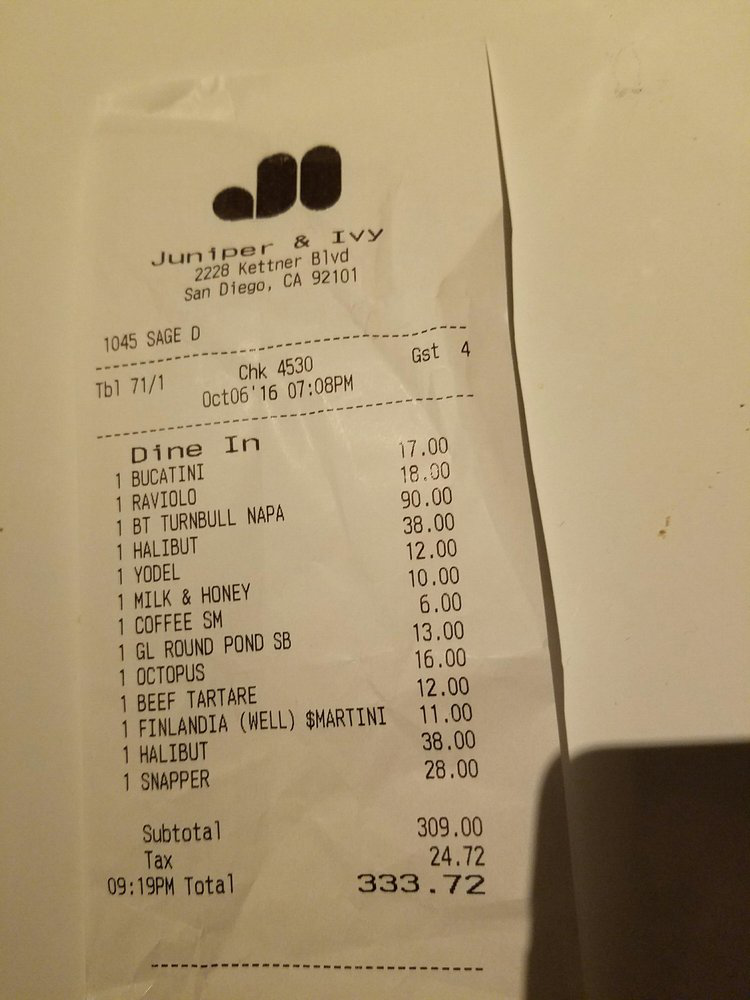

In [29]:
Image.open("images/4.jpeg")

In [30]:
image = cv2.imread("images/4.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)

In [31]:

# find contours in the edge map, then initialize
# the contour that corresponds to the document
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None
 
# ensure that at least one contour was found
if len(cnts) > 0:
 # sort the contours according to their size in
# descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
    # loop over the sorted contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # if our approximated contour has four points,
    # then we can assume we have found the paper
    if len(approx) == 4:
        docCnt = approx
        break

In [32]:
# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))

In [33]:
thresh = cv2.threshold(warped, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [35]:
Image.fromarray(thresh)

In [36]:
def finding_date(img_ar):
    img_str = pt.image_to_string(Image.fromarray(img_ar))
    newstr = list(set(map(lambda x : x.strip(), img_str.split('\n'))))
    tags = []
    for i in newstr:
        try:
            find_date = search_dates(i) 
        except:
            continue
        if find_date:
            for j in find_date:
                tags.append(j[0])

    pattern1 = r"(\d{1,4}([.'’\-/])\d{1,2}([.'’\-/])\d{1,4})"
    pattern2 = r"(\d{1,4}([.'’\-/\s])[ADFJMNOSadfjmnos]\w*([.'’\-/\s]*)\d{1,4})"
    pattern3 = r"([ADFJMNOSadfjmnos]\w*\s\d{1,4}([,'’.\-/\s]*)([.'’\-/\s])\d{1,4})"
    pattern4 = r"[ADFJMNOSadfjmnos]\w*\d{1,4}(['’]*)\d{1,4}"
    pattern5 = r"(\d{1,4}([.'’\-/\s])\d{1,4}"
    
    date_find = []

    for i in tags:
        for j in (re.search(regex,i) for regex in [pattern1, pattern2, pattern3, pattern4]):
            if j:
                s = j.group()
                if s.find('.'):
                    date_find.append("-".join(s.split('.')))
                else:
                    date_find.append(s)

    date_find = list(set(date_find))

    dates = {}
    for i in date_find:
        try:
            dates[i] = search_dates(i)[0][1].strftime("%Y-%m-%d")
        except:
            continue
    print(dates)
    if dates:
        #print(min(dates.values()))
        return min(dates.values())
    return None

In [40]:
gaussian_filter = (3,3)
img = cv2.imread('images/9.jpeg') # 450,338,3
image = cv2.resize(img, None, fx = 2, fy = 2, interpolation=cv2.INTER_CUBIC) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, gaussian_filter, 0)


In [41]:
img_str = pt.image_to_string(Image.fromarray(blurred))
print(img_str)

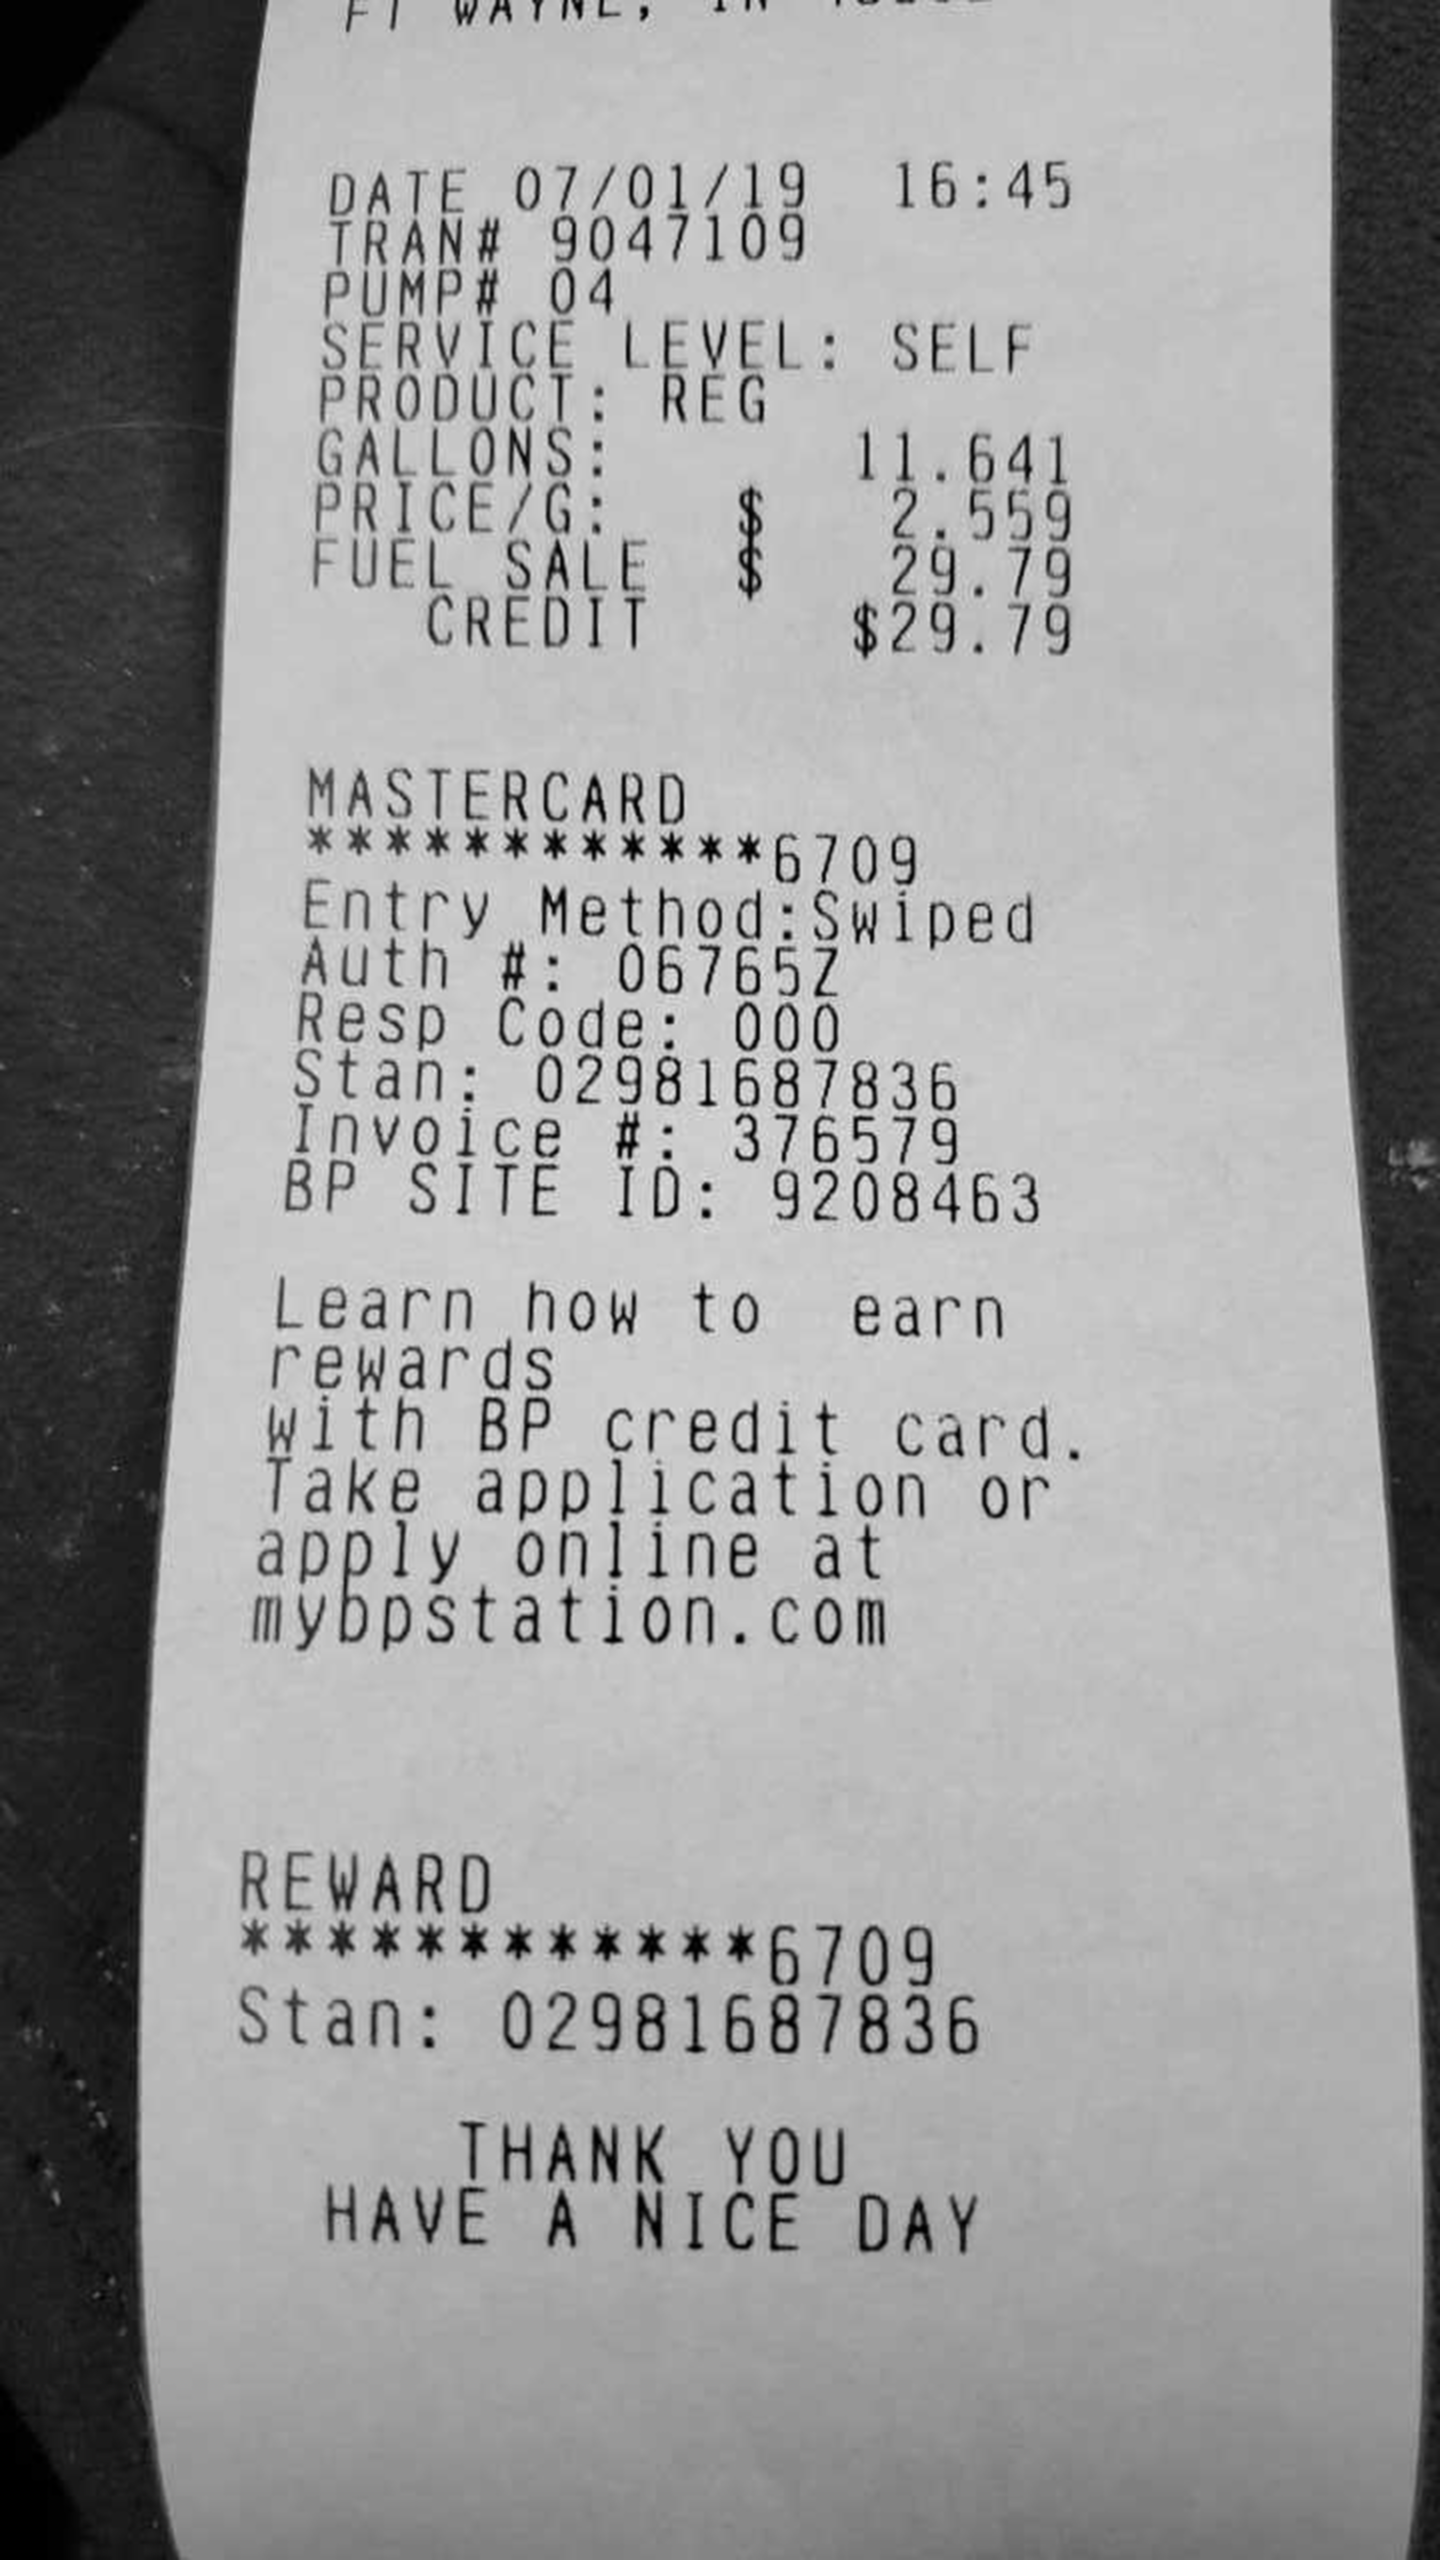

In [42]:
Image.fromarray(blurred)

In [46]:
img_str = pt.image_to_string('images/38.jpeg', lang='eng')
print(img_str)

301 P.C.H HWY
NEWPC Rt BEACH CA
92660

SIDE_CHEVRON
eee

XXXXXXXXXXX2007
AMEX é

INVOICE E/8755208
AUTH 564282
PUNPE 9

UNLEAD REG 20,465G
PRICE/GAL $3 .899

FUEL TOTAL

   
   
   
  
   

   
      
      
  

    

  
   
 
 

CREDIT
Swiped

 
        
     

Get rewarded on
every fill-up at
Chevron with a
Techron hdvantace
card. See app
